## Evaluacion de modelos

Librerias

In [2]:
# Carga de librerias
from IPython.display import display
import subprocess as sp
import numpy as np
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rcParams
from sklearn.metrics import r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import random
import time
from datetime import datetime
import datetime
from scipy import stats
import statsmodels.api as sm
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler , MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

#Modelos
from sklearn import svm
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import pickle



### XGBoosting

In [3]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,1.864957,1.181576,-1.046820,-0.076604,1.149148,0.952627,1.149148,-0.568387,-0.642760,1.254131,-0.15446,1.074511,-0.327685,1.305231,-0.310092,0.092180,0.619410,-2.344194,-2.633405,-1.149148
1,-0.035364,0.392099,-0.575036,-0.390030,1.149148,-1.112103,1.149148,-0.638472,-0.105575,1.254131,-0.15446,0.493266,-0.398792,0.940438,-0.364506,-1.513967,-1.044087,0.069510,0.009980,-1.149148
2,1.381239,0.392099,1.783887,0.236822,-0.516276,0.998510,-0.516276,-0.673514,-1.121405,-0.229189,-0.15446,0.878341,-1.022499,-0.656248,-0.418920,0.462829,0.857052,-0.976991,0.138478,0.516276
3,0.724765,-0.397378,-1.636551,0.550248,-0.516276,1.319690,-0.516276,-0.480781,0.218948,-0.229189,-0.15446,-2.088431,1.923351,-0.737637,0.397287,-0.690302,-1.281729,0.491486,0.413831,0.516276
4,-1.451967,-1.186856,0.604426,1.803951,1.149148,-0.148562,1.149148,-0.655993,1.306807,-0.229189,-0.15446,-0.247822,0.171078,0.746815,-0.418920,-1.513967,-0.806444,-0.082401,-0.081804,-1.149148


Mean Squared Error (MSE): 0.014887777970881725
Root Mean Squared Error (RMSE): 0.12201548250481054
R-squared (R2): 0.985400534473852


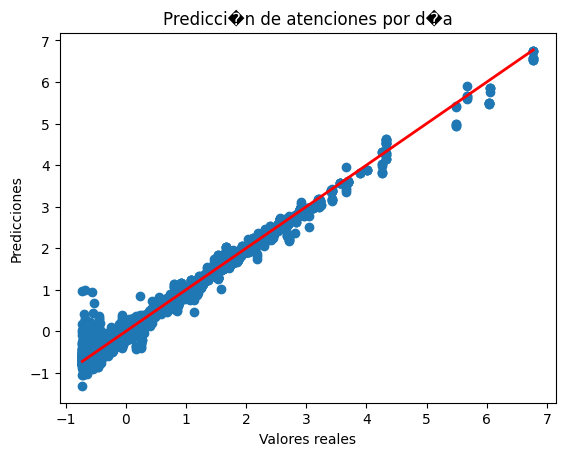

In [4]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Se importa libreria para realizar modelo de XGBOOST

from xgboost import XGBRegressor

# Definir el modelo
model = XGBRegressor()
# Entrenar el modelo
model.fit(X_train, y_train)
# Predecir valores
y_pred = model.predict(X_test)
# Calcular el error cuadr�tico medio

#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()


Rectificar si existe sobreajuste en el modelo

In [5]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 0.009017286610402851
Root Mean Squared Error (RMSE) en entrenamiento: 0.09495939453473179
R-squared (R2) en entrenamiento: 0.9909056274299703


DataSet completo

In [60]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,1.194948,-1.974352,0.602532,-1.321857,-0.519987,-0.047352,-0.519987,0.940779,2.465456,1.257381,-0.154567,-1.600478,1.317594,-1.045526,1.892793,0.637559,-0.087688,1.152001,1.022374,0.519987
1,1.505217,0.393846,-1.164960,0.865390,1.145917,-0.599838,1.145917,1.497179,-0.383800,-0.223878,-0.154567,1.802763,-2.429428,0.939361,-0.475939,-0.684348,0.150485,-0.748233,-0.418352,-1.145917
2,1.539691,1.183245,-1.282793,0.240463,1.145917,-0.599838,1.145917,1.723217,-0.326414,1.257381,-0.154567,-0.233364,0.110503,1.382943,-0.314435,-2.419352,-2.231252,-0.035646,-0.030464,-1.145917
3,0.677834,-1.184953,-0.575796,-0.384465,1.145917,0.689295,1.145917,0.054016,-1.138896,-0.223878,-0.154567,0.687741,-0.925528,0.658616,-0.475939,-0.353871,0.388659,-1.571102,-1.646664,-1.145917
4,1.470742,0.393846,0.720365,-0.696929,1.145917,-0.599838,1.145917,1.757992,-0.774624,-1.705138,-0.154567,-0.330322,0.322800,0.798987,-0.368269,-1.097444,-0.564036,-0.222276,-0.048935,-1.145917


In [58]:
type(dataset['estacion'])

pandas.core.series.Series

In [62]:
dataset['estacion'].unique()

array([-0.51998662,  1.14591675, -2.18589   ])

In [80]:
dataEstacion = dataset[dataset['estacion'].round(6) == round(1.14591675, 6)]
dataEstacion.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
1,1.505217,0.393846,-1.164960,0.865390,1.145917,-0.599838,1.145917,1.497179,-0.383800,-0.223878,-0.154567,1.802763,-2.429428,0.939361,-0.475939,-0.684348,0.150485,-0.748233,-0.418352,-1.145917
2,1.539691,1.183245,-1.282793,0.240463,1.145917,-0.599838,1.145917,1.723217,-0.326414,1.257381,-0.154567,-0.233364,0.110503,1.382943,-0.314435,-2.419352,-2.231252,-0.035646,-0.030464,-1.145917
3,0.677834,-1.184953,-0.575796,-0.384465,1.145917,0.689295,1.145917,0.054016,-1.138896,-0.223878,-0.154567,0.687741,-0.925528,0.658616,-0.475939,-0.353871,0.388659,-1.571102,-1.646664,-1.145917
4,1.470742,0.393846,0.720365,-0.696929,1.145917,-0.599838,1.145917,1.757992,-0.774624,-1.705138,-0.154567,-0.330322,0.322800,0.798987,-0.368269,-1.097444,-0.564036,-0.222276,-0.048935,-1.145917
7,1.194948,-1.184953,-1.282793,1.490318,1.145917,-0.599838,1.145917,2.609979,-0.177801,1.257381,-0.154567,-0.121861,0.018355,0.863559,-0.045261,-1.634469,-1.278557,-1.206325,-1.175658,-1.145917


Mean Squared Error (MSE): 0.0063210037819750545
Root Mean Squared Error (RMSE): 0.07950474062579574
R-squared (R2): 0.9960512243753346


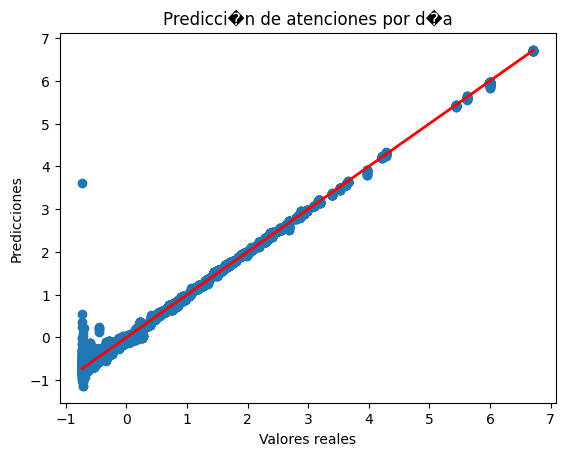

In [82]:
X = dataEstacion.drop(columns=['atenciones_por_dia'], axis=1)
y = dataEstacion['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Realizar modelo de XGBOOST

from xgboost import XGBRegressor

# Definir el modelo
modelXGB = XGBRegressor()
# Entrenar el modelo
modelXGB.fit(X_train, y_train)
# Predecir valores
y_pred = modelXGB.predict(X_test)
# Calcular el error cuadr�tico medio

#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()


In [74]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = modelXGB.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')

Mean Squared Error (MSE) en entrenamiento: 0.44402755806074873
Root Mean Squared Error (RMSE) en entrenamiento: 0.6663539285250359
R-squared (R2) en entrenamiento: 0.6398727488039844


### Light Gradient

In [9]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024MuestraEscalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,1.864957,1.181576,-1.046820,-0.076604,1.149148,0.952627,1.149148,-0.568387,-0.642760,1.254131,-0.15446,1.074511,-0.327685,1.305231,-0.310092,0.092180,0.619410,-2.344194,-2.633405,-1.149148
1,-0.035364,0.392099,-0.575036,-0.390030,1.149148,-1.112103,1.149148,-0.638472,-0.105575,1.254131,-0.15446,0.493266,-0.398792,0.940438,-0.364506,-1.513967,-1.044087,0.069510,0.009980,-1.149148
2,1.381239,0.392099,1.783887,0.236822,-0.516276,0.998510,-0.516276,-0.673514,-1.121405,-0.229189,-0.15446,0.878341,-1.022499,-0.656248,-0.418920,0.462829,0.857052,-0.976991,0.138478,0.516276
3,0.724765,-0.397378,-1.636551,0.550248,-0.516276,1.319690,-0.516276,-0.480781,0.218948,-0.229189,-0.15446,-2.088431,1.923351,-0.737637,0.397287,-0.690302,-1.281729,0.491486,0.413831,0.516276
4,-1.451967,-1.186856,0.604426,1.803951,1.149148,-0.148562,1.149148,-0.655993,1.306807,-0.229189,-0.15446,-0.247822,0.171078,0.746815,-0.418920,-1.513967,-0.806444,-0.082401,-0.081804,-1.149148


In [10]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1963
[LightGBM] [Info] Number of data points in the train set: 20097, number of used features: 19
[LightGBM] [Info] Start training from score -0.001954
Mean Squared Error (MSE): 0.009256308278247439
Root Mean Squared Error (RMSE): 0.09620970989586985
R-squared (R2): 0.9909229467371168


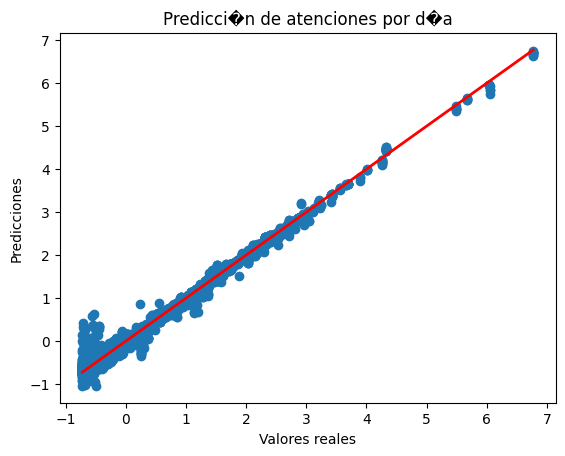

In [11]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()

In [12]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 0.0054266328303696106
Root Mean Squared Error (RMSE) en entrenamiento: 0.07366568285415952
R-squared (R2) en entrenamiento: 0.9945269765848187


Datos totales 

In [13]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,1.194948,-1.974352,0.602532,-1.321857,-0.519987,-0.047352,-0.519987,0.940779,2.465456,1.257381,-0.154567,-1.600478,1.317594,-1.045526,1.892793,0.637559,-0.087688,1.152001,1.022374,0.519987
1,1.505217,0.393846,-1.164960,0.865390,1.145917,-0.599838,1.145917,1.497179,-0.383800,-0.223878,-0.154567,1.802763,-2.429428,0.939361,-0.475939,-0.684348,0.150485,-0.748233,-0.418352,-1.145917
2,1.539691,1.183245,-1.282793,0.240463,1.145917,-0.599838,1.145917,1.723217,-0.326414,1.257381,-0.154567,-0.233364,0.110503,1.382943,-0.314435,-2.419352,-2.231252,-0.035646,-0.030464,-1.145917
3,0.677834,-1.184953,-0.575796,-0.384465,1.145917,0.689295,1.145917,0.054016,-1.138896,-0.223878,-0.154567,0.687741,-0.925528,0.658616,-0.475939,-0.353871,0.388659,-1.571102,-1.646664,-1.145917
4,1.470742,0.393846,0.720365,-0.696929,1.145917,-0.599838,1.145917,1.757992,-0.774624,-1.705138,-0.154567,-0.330322,0.322800,0.798987,-0.368269,-1.097444,-0.564036,-0.222276,-0.048935,-1.145917


In [14]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1981
[LightGBM] [Info] Number of data points in the train set: 66989, number of used features: 19
[LightGBM] [Info] Start training from score 0.003378
Mean Squared Error (MSE): 0.005764928380902468
Root Mean Squared Error (RMSE): 0.07592712546186947
R-squared (R2): 0.9941461124916768


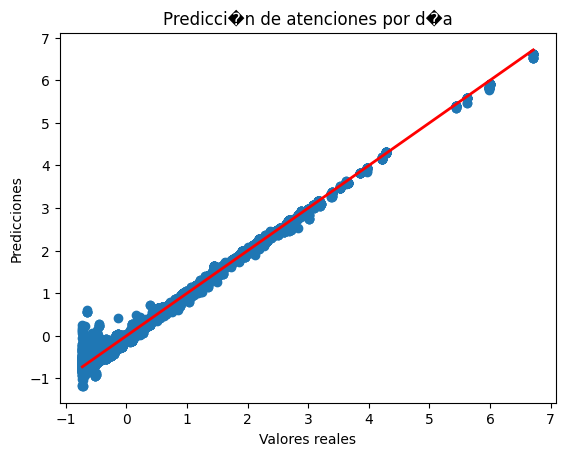

In [ ]:
#Hacer modelo LightGradientBoost

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=32, random_state=42)

lgbm.fit(X_train, y_train)

# Predecir sobre datos de prueba

y_pred = lgbm.predict(X_test)
# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la prediccion vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Linea de referencia')  #Linea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Prediccion de atenciones por dia')
plt.show()

In [16]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = lgbm.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 0.004886470316028661
Root Mean Squared Error (RMSE) en entrenamiento: 0.06990329259790744
R-squared (R2) en entrenamiento: 0.995144965451048


### RandomForest

In [17]:
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024Escalados.csv')
dataset.head()

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,1.194948,-1.974352,0.602532,-1.321857,-0.519987,-0.047352,-0.519987,0.940779,2.465456,1.257381,-0.154567,-1.600478,1.317594,-1.045526,1.892793,0.637559,-0.087688,1.152001,1.022374,0.519987
1,1.505217,0.393846,-1.164960,0.865390,1.145917,-0.599838,1.145917,1.497179,-0.383800,-0.223878,-0.154567,1.802763,-2.429428,0.939361,-0.475939,-0.684348,0.150485,-0.748233,-0.418352,-1.145917
2,1.539691,1.183245,-1.282793,0.240463,1.145917,-0.599838,1.145917,1.723217,-0.326414,1.257381,-0.154567,-0.233364,0.110503,1.382943,-0.314435,-2.419352,-2.231252,-0.035646,-0.030464,-1.145917
3,0.677834,-1.184953,-0.575796,-0.384465,1.145917,0.689295,1.145917,0.054016,-1.138896,-0.223878,-0.154567,0.687741,-0.925528,0.658616,-0.475939,-0.353871,0.388659,-1.571102,-1.646664,-1.145917
4,1.470742,0.393846,0.720365,-0.696929,1.145917,-0.599838,1.145917,1.757992,-0.774624,-1.705138,-0.154567,-0.330322,0.322800,0.798987,-0.368269,-1.097444,-0.564036,-0.222276,-0.048935,-1.145917


In [18]:
X = dataset.drop('atenciones_por_dia', axis=1)
y = dataset['atenciones_por_dia']
# Separar datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
#Hacer modelo de randomforest

from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir con los datos de prueba

y_pred = rf_model.predict(X_test)

# Evaluar el modelo
#Metricas del modelo SVM
from sklearn.metrics import mean_absolute_error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
#Metricas mae
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')
# Graficar la predicci�n vs el valor real
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='L�nea de referencia')  # L�nea de referencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicci�n de atenciones por d�a')
plt.show()

KeyboardInterrupt: 

In [ ]:

# Predicciones en el conjunto de entrenamiento
y_train_pred = rf_model.predict(X_train)

# Calcular el error cuadr�tico medio en entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Imprimir las m�tricas para el conjunto de entrenamiento
print(f'Mean Squared Error (MSE) en entrenamiento: {mse_train}')
print(f'Root Mean Squared Error (RMSE) en entrenamiento: {rmse_train}')
print(f'R-squared (R2) en entrenamiento: {r2_train}')





Mean Squared Error (MSE) en entrenamiento: 0.00014460325090131582
Root Mean Squared Error (RMSE) en entrenamiento: 0.01202510918459021
R-squared (R2) en entrenamiento: 0.9998563270144681


### Tablar con los resultados de cada modelo

In [ ]:
#Se crea un dataframe y se define las columnas
metrics_df = pd.DataFrame(columns=['Modelo', 'R²', 'MSE', 'RMSE', 'MAE'])
# Diccionario para almacenar las predicciones por modelo
pred_dict = {}
# Lista de modelos entrenados
models = {
    'Modelo Xgboost': modelXGB,
    'Modelo Light Gradient': lgbm,
    'Modelo Random Forest': rf_model
}

# Evaluar cada modelo
for model_name, model in models.items():
    # Hacer predicciones
    y_pred = model.predict(X_test)

    
    # Calcular las métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Crear un DataFrame para las métricas del modelo actual
    model_metrics = pd.DataFrame([{
        'Modelo': model_name,
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }])
    
    # Concatenar el DataFrame actual con el DataFrame de métricas
    metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)
    # Almacenar las predicciones en el diccionario con una clave que seria el nombre del modelo
    pred_dict[f'y_pred_{model_name}'] = y_pred

# Mostrar la tabla de métricas
print(metrics_df)



C:\Users\USER\AppData\Local\Temp\ipykernel_24872\597904037.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([metrics_df, model_metrics], ignore_index=True)


                  Modelo        R²       MSE      RMSE       MAE
0         Modelo Xgboost  0.989719  0.010125  0.100622  0.069805
1  Modelo Light Gradient  0.994146  0.005765  0.075927  0.052088
2   Modelo Random Forest  0.998788  0.001194  0.034555  0.004493


Diccionario con las prediciciones de cada modelo

In [ ]:
pred_dict

{'y_pred_Modelo Xgboost': array([-0.60261387, -0.5835862 , -0.6915228 , ...,  5.8105483 ,
        -0.14277165, -0.3742466 ], dtype=float32),
 'y_pred_Modelo Light Gradient': array([-0.63741271, -0.58521994, -0.69149826, ...,  5.90576911,
        -0.21185962, -0.47325645]),
 'y_pred_Modelo Random Forest': array([-0.57801968, -0.64252732, -0.67278158, ...,  6.00054266,
        -0.11985894, -0.41544651])}

Se desescalan las predciones

In [ ]:
# Desescalar las predicciones Modelos 
import joblib
scaler = joblib.load('data/analytics/scaler.pkl')


# Acceder a las predicciones de cada modelo desde el diccionario
y_pred_XGBoost = pred_dict['y_pred_Modelo Xgboost']
y_pred_lgbm = pred_dict['y_pred_Modelo Light Gradient']
y_pred_rf = pred_dict['y_pred_Modelo Random Forest']

# Se asegura que esten la forma correcta de este scaler
y_pred_XGBoost = y_pred_XGBoost.reshape(-1, 1)  # Forma (n_samples, 1)
y_pred_lgbm = y_pred_lgbm.reshape(-1, 1)
y_pred_rf = y_pred_rf.reshape(-1, 1)


In [ ]:
# Crear una matriz vacía con el número de columnas de entrenamiento
n_features = scaler.scale_.shape[0]  # Número de columnas que el escalador fue entrenado
n_features

20

In [ ]:
pred_matrix = np.zeros((y_pred_XGBoost.shape[0], n_features))  # Crear la matriz vacía con zeros pero que sea el tamaño de los y_pred
#de los modelos y con 20 que son las 20 características con las que el scaler se escalo

# Colocar las predicciones en la columna 7 (ya que la variable objetivo está en la columna 7 que es atenciones_por_dia)
pred_matrix[:, 7] = y_pred_XGBoost.flatten()
# Desescalar la matriz de predicciones para el primer modelo
y_pred_descaled_matrix = scaler.inverse_transform(pred_matrix)
# Extraer la columna desescalada (la columna 7 que corresponde a tu variable objetivo)
y_pred_descaledXGBoost = y_pred_descaled_matrix[:, 7]

# Hacer lo mismo para los otros modelos:
pred_matrix[:, 7] = y_pred_lgbm.flatten()
y_pred_descaledLGBM = scaler.inverse_transform(pred_matrix)[:, 7]

pred_matrix[:, 7] = y_pred_rf.flatten()
y_pred_descaledRF = scaler.inverse_transform(pred_matrix)[:, 7]

# Mostrar las predicciones desescaladas
print("Predicciones desescaladas XGBoost:", y_pred_descaledXGBoost)
print("Predicciones desescaladas LGBM:", y_pred_descaledLGBM)
print("Predicciones desescaladas Random Forest:", y_pred_descaledRF)

# # Desescalar los valores reales (si es necesario)
# y_test_descaledModelos = scaler.inverse_transform(y_test.reshape(-1, 1))

Predicciones desescaladas XGBoost: [  8.23552522   9.32985421   3.12214563 ... 377.07293724  34.68223119
  21.36951283]
Predicciones desescaladas LGBM: [  6.23415463   9.23589465   3.12355545 ... 382.54933029  30.70880467
  15.67520237]
Predicciones desescaladas Random Forest: [  9.65   5.94   4.2  ... 388.    36.    19.  ]


In [ ]:
# Convertir y_test a un array de NumPy y luego hacer reshape
y_test = y_test.to_numpy().reshape(-1, 1)  # Ahora puedes usar reshape en el array

# Crear una matriz vacía con el número de columnas que tiene el conjunto de datos original
n_features = scaler.scale_.shape[0]  # Número de columnas que el escalador fue entrenado
test_matrix = np.zeros((y_test.shape[0], n_features))  # Crear la matriz vacía

# Colocar y_test en la columna 7 (ya que la variable objetivo está en la columna 7)
test_matrix[:, 7] = y_test.flatten()

# Desescalar la matriz de y_test
y_test_descaled_matrix = scaler.inverse_transform(test_matrix)

# Extraer la columna 7 desescalada (la columna 7 que corresponde a tu variable objetivo)
y_test_descaled = y_test_descaled_matrix[:, 7]

# Mostrar los valores reales desescalados
print("Valores reales desescalados (y_test):", y_test_descaled)

Valores reales desescalados (y_test): [ 10.   6.   4. ... 388.  36.  19.]


### Correr o desfasar 7 dias para ver incidencia de pm25 con las atenciones

In [ ]:
y_pred_descaledXGBoost

print(f"El valor predecidos minimo del modelo random forest da {y_pred_descaledRF.min()}\n del LGBM da {y_pred_descaledLGBM.min()}\n y del XGBOOST{y_pred_descaledXGBoost.min()}")


El valor predecidos minimo del modelo random forest da 1.0599999999999739
 del LGBM da -24.807701550251608
 y del XGBOOST-63.32473169274738


In [85]:
#dataset
dataset =  pd.read_csv('data/analytics/datasetEstudio-2020-2024.csv')
dataset.head()


,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,79,2020,21,2,1.0,43.0,1.0,97,34.2562,2.0,0,18.58,89.029999,843.130005,0.44,1.12,1.6,257.0,261.0,1.0
1,88,2023,6,9,2.0,31.0,2.0,129,14.9075,1.0,0,25.60,52.230000,850.200000,0.00,0.80,1.7,145.0,183.0,0.0
2,89,2024,5,7,2.0,31.0,2.0,142,15.2972,2.0,0,21.40,77.175000,851.779999,0.03,0.38,0.7,187.0,204.0,0.0
3,64,2021,11,5,2.0,59.0,2.0,46,9.7798,1.0,0,23.30,67.000000,849.200012,0.00,0.88,1.8,96.5,116.5,0.0
4,87,2023,22,4,2.0,31.0,2.0,144,12.2535,0.0,0,21.20,79.260000,849.700000,0.02,0.70,1.4,176.0,203.0,0.0


In [86]:
# Ordenar el dataset por las columnas 'anio', 'mes', y 'dia'
dataset = dataset.sort_values(by=['anio', 'mes', 'dia']).reset_index(drop=True)
dataset.head(14)




,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,74,2020,1,1,1.0,23.0,1.0,25,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
1,66,2020,1,1,1.0,73.0,1.0,21,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
2,76,2020,1,1,1.0,73.0,1.0,21,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
3,52,2020,1,1,1.0,73.0,1.0,21,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
4,59,2020,1,1,1.0,73.0,1.0,21,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
5,90,2020,1,1,1.0,73.0,1.0,21,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
6,90,2020,1,1,1.0,23.0,1.0,25,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
7,53,2020,1,1,1.0,43.0,1.0,13,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
8,79,2020,1,1,1.0,23.0,1.0,25,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
9,52,2020,1,1,1.0,23.0,1.0,25,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0


In [87]:
# Especificar las columnas a desfase
columns_to_shift = [
    'NombreIPS', 'atenciones_por_dia', 'comuna', 'edad'
]
dataRipsShift =  dataset.copy()
# Aplicar el desfase de 7 días hacia arriba
dataRipsShift[columns_to_shift] = dataRipsShift[columns_to_shift].shift(-7)

# Opcional: eliminar filas con valores NaN generados por el desfase
dataRipsShift = dataRipsShift.dropna(subset=columns_to_shift, how='all').reset_index(drop=True)
dataRipsShift.head(7)

,edad,anio,dia,mes,sector_ips,NombreIPS,estacion,atenciones_por_dia,pm25,dia_semana,festivo,temperatura,humedad,presion,p1,velocidad_prom,velocidad_max,direccion_prom,direccion_max,comuna
0,53.0,2020,1,1,1.0,43.0,1.0,13.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
1,79.0,2020,1,1,1.0,23.0,1.0,25.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
2,52.0,2020,1,1,1.0,23.0,1.0,25.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
3,72.0,2020,1,1,1.0,73.0,1.0,21.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
4,84.0,2020,1,1,1.0,23.0,1.0,25.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
5,43.0,2020,1,1,1.0,23.0,1.0,25.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0
6,72.0,2020,1,1,1.0,23.0,1.0,25.0,21.3637,1.0,1,22.585,84.0,842.660004,0.01,0.98,1.8,141.0,199.0,1.0


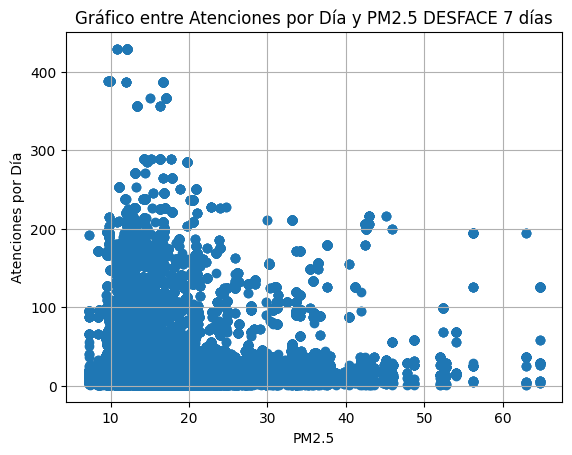

In [88]:
# Graficar atenciones_dia vs pm25
plt.scatter( dataRipsShift['pm25'],dataRipsShift['atenciones_por_dia'])
plt.ylabel('Atenciones por Día')
plt.xlabel('PM2.5')
plt.title('Gráfico entre Atenciones por Día y PM2.5 DESFACE 7 días')
plt.grid(True)
plt.show()

In [90]:
#NombreIPS
len(dataRipsShift.NombreIPS.unique())

79

In [91]:
len(dataRipsShift.comuna.unique())

3

In [92]:
len(dataRipsShift)

95692

In [93]:
len(dataRipsShift.columns)

20

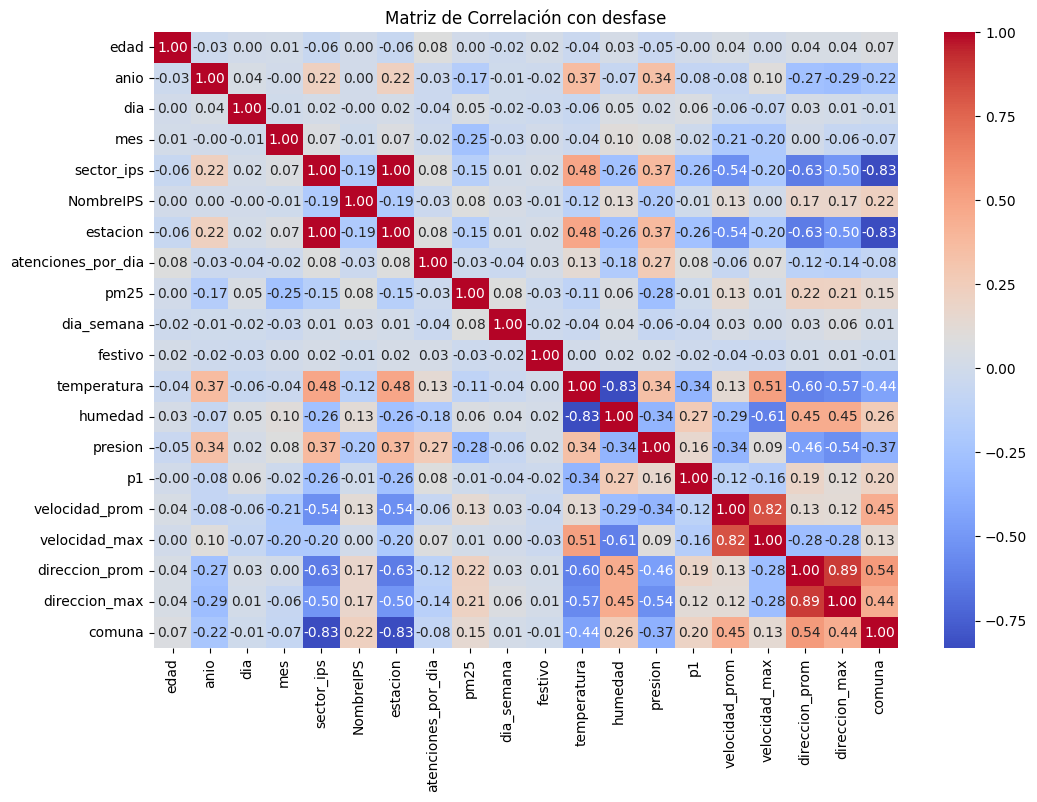

In [46]:
#MAtriz de correlacion
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear una matriz de correlación
correlation_matrix = dataRipsShift.corr()
# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación con desfase')
plt.show()

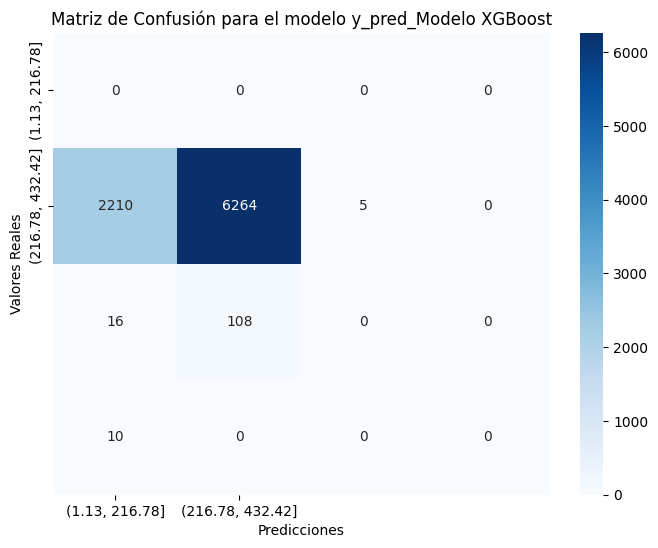

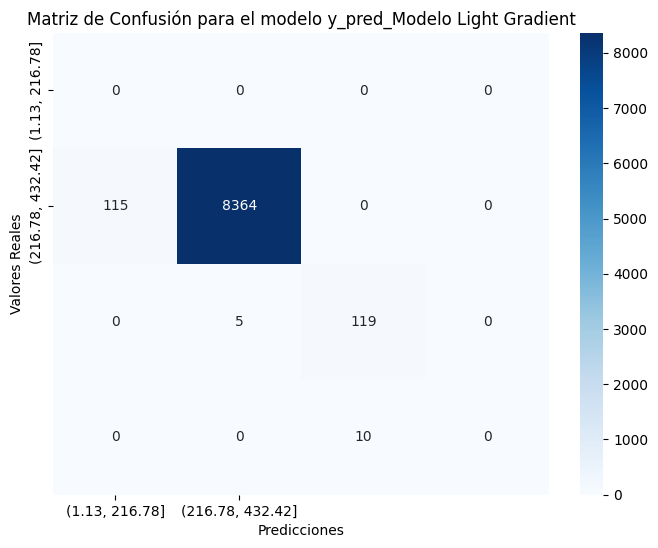

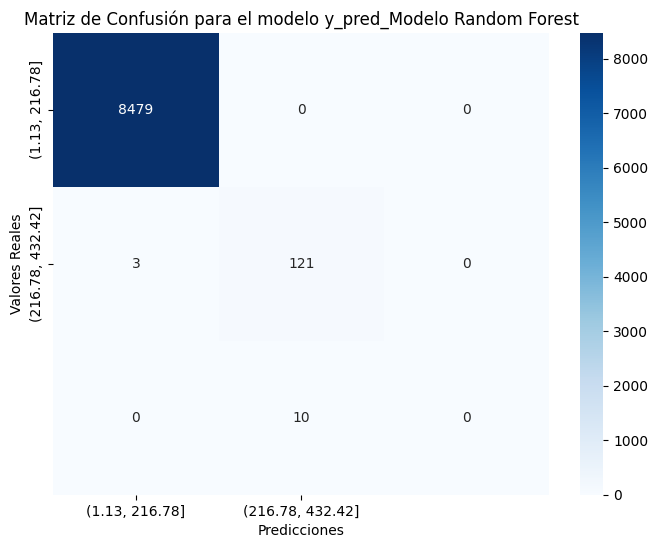

In [ ]:
# #Discretizamos para poder hacer la matriz de confusion
# #Para ello primero se debe definir los bins (intervalos) para discretizar los valores
# bins = np.linspace(start=min(y_test_descaled.min(), y_pred_descaledRF.min()), 
#                    stop=max(y_test_descaled.max(), y_pred_descaledXGBoost.max()), 
#                    num=3)  # Ajusta el número de bins según lo que necesites

# # Crear etiquetas con los rangos de los bins
# bin_labels = [f"({bins[i]:.2f}, {bins[i+1]:.2f}]" for i in range(len(bins)-1)]

# # Diccionario con las predicciones de cada modelo
# pred_dict = {
#     'y_pred_Modelo XGBoost': y_pred_descaledXGBoost,
#     'y_pred_Modelo Light Gradient': y_pred_descaledLGBM,
#     'y_pred_Modelo Random Forest': y_pred_descaledRF
# }

# # Crear un gráfico de la matriz de confusión para cada modelo
# for model_name, y_pred in pred_dict.items():
#     y_pred_descaled = y_pred 

#     # Discretizar las predicciones y los valores reales
#     y_test_discretized = np.digitize(y_test_descaled, bins)  # Para valores reales
#     y_pred_discretized = np.digitize(y_pred_descaled, bins)  # Para las predicciones del modelo actual

#     # Crear la matriz de confusión
#     cm = confusion_matrix(y_test_discretized, y_pred_discretized)

#     # Visualizar la matriz de confusión con un heatmap
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=bin_labels, yticklabels=bin_labels)
#     plt.xlabel('Predicciones')
#     plt.ylabel('Valores Reales')
#     plt.title(f'Matriz de Confusión para el modelo {model_name}')
#     plt.show()

In [89]:
import tensorflow as tf
#!pip install tensorflow_hub
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import h5py
import pandas as pd

%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def get_top3_inceptionv1_labels(img, labels_list):
    import tensorflow_hub as hub
    from skimage.transform import resize
    modeloImportado = hub.KerasLayer("https://kaggle.com/models/google/inception-v1/TensorFlow2/classification/1")
    m = modeloImportado   # load the tensorflow hub model
    rimg = resize(img, output_shape=(1,224,224,3), anti_aliasing=True) # resize and reshape the image to [1,224,224,3]  ese 1 es el batch y sienmpre debe ponerse
    rimg =  (rimg - rimg.min())/(rimg.max() - rimg.min())# normalize the image to a [0,1] range 
    #substracting the minimum value and dividing by the difference between the maximum and the minimum.
    logits = m.predict(rimg) # feed the image into the model to obtain the logits
    # convert logits to probabilities
    probs = tf.nn.softmax(logits)
    # get the top 3 labels according to the probabilitys into a dict
    r = tf.argsort(probs, axis=-1, direction="DESCENDING")[:3]   
    return r
